In [9]:
# Exemplo de como usar  graphviz
import pandas
import graphviz
from graphviz import Digraph
import datetime as dt
import pm4py
from datetime import datetime as date

### Importa o arquivo csv pelo pandas

In [10]:
#'sep' define que tipo de separação o arquivo tem, geralmente tem ',' como default event_log agora é uma 'tabela'
event_log = pm4py.format_dataframe(pandas.read_csv("C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\running-example_3.csv", sep=';'), case_id='case_id', activity_key='activity', timestamp_key='timestamp')
event_log

,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1,register request,2010-12-30 10:02:00+00:00,50,Pete,1,register request,2010-12-30 10:02:00+00:00,0,0
1,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,1,examine thoroughly,2010-12-31 09:06:00+00:00,1,0
2,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,1,check ticket,2011-01-05 14:12:00+00:00,2,0
3,1,decide,2011-01-06 10:18:00+00:00,200,Sara,1,decide,2011-01-06 10:18:00+00:00,3,0
4,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,1,reject request,2011-01-07 13:24:00+00:00,4,0
5,2,register request,2010-12-30 10:32:00+00:00,50,Mike,2,register request,2010-12-30 10:32:00+00:00,5,1
6,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,2,check ticket,2010-12-30 11:12:00+00:00,6,1
7,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,2,examine casually,2010-12-30 13:16:00+00:00,7,1
8,2,decide,2011-01-05 10:22:00+00:00,200,Sara,2,decide,2011-01-05 10:22:00+00:00,8,1
9,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,2,pay compensation,2011-01-08 11:05:00+00:00,9,1


### Filtra exibe o numero de casos e o número de eventos

In [11]:
num_cases = len(event_log.case_id.unique())
num_events = len(event_log)
print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

Number of events: 42
Number of cases: 6


### Organiza a lista em ordem de eventos pelo tempo

In [12]:
total_cases = event_log.case_id
clients = sorted(event_log.timestamp)
listaOrganizada = list(zip(total_cases, clients))
print("Lista de eventos organizado por tempo:\n {}".format(listaOrganizada))

Lista de eventos organizado por tempo:
 [(1, Timestamp('2010-12-30 10:02:00+0000', tz='UTC')), (1, Timestamp('2010-12-30 10:32:00+0000', tz='UTC')), (1, Timestamp('2010-12-30 11:12:00+0000', tz='UTC')), (1, Timestamp('2010-12-30 13:16:00+0000', tz='UTC')), (1, Timestamp('2010-12-30 13:32:00+0000', tz='UTC')), (2, Timestamp('2010-12-30 14:06:00+0000', tz='UTC')), (2, Timestamp('2010-12-30 15:34:00+0000', tz='UTC')), (2, Timestamp('2010-12-31 09:06:00+0000', tz='UTC')), (2, Timestamp('2011-01-05 10:22:00+0000', tz='UTC')), (2, Timestamp('2011-01-05 14:12:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 08:02:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 08:18:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 10:18:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 11:18:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 12:06:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 14:02:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 14:02:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 15:06:00+0000',

In [13]:
end_activities = pm4py.get_end_activities(event_log)
print("atividades finais:\n{}".format(end_activities))

atividades finais:
{'reject request': 3, 'pay compensation': 3}


### Calcula a média de tempo:

In [14]:
if __name__ == "__main__":
    # Dicionário para cada pessoa
    # listaPessoas = list(event_log['case_id'])
    # listaProcessos = list(event_log['activity'])
    # listaPeriodos = list(event_log['timestamp'])
    # # Cria um dicionário tendo como chave uma pessoa e um valor com listas de eventos e o horário que começou
    # dicPessoas = {}
    # for (i,pessoa) in enumerate(listaPessoas):
    #     if pessoa in dicPessoas:
    #         dicPessoas[pessoa] += tuple([[listaProcessos[i],listaPeriodos[i]]])
    #     else:
    #         dicPessoas[pessoa] = tuple([[listaProcessos[i],listaPeriodos[i]]])

    # dicIntervalos = {}
    # listaVazia = []
    # for key, value in dicPessoas.items():
    #     for atividades in value:
    #         print(atividades)
    #         atividades[1] = atividades[1][:-6]
    #         date.strptime(atividades[1], '%Y-%m-%d %H:%M:%S')
    #         listaVazia.append(atividades)
            
        
    #     for (i,el) in enumerate(listaVazia):
    #         if el[0] not in dicIntervalos:
    #             if i == (len(listaVazia)-1):
    #                 dicIntervalos[el[0]] == 0
    #             else:
    #                 dicIntervalos[el[0]] = listaVazia[i+1][1] - el[1]
    #         else:
    #             dicIntervalos[el[0]] += listaVazia[i+1][1] - el[1]
    pessoa = pm4py.filter_event_attribute_values(event_log, attribute_key='case:concept:name', values={'3'}, level='event')
    total_duration = 0
    total_events = 0
    for event in pessoa:
        print(event)
        # total_duration += event['time:timestamp'].timestamp() - pessoa[0]['time:timestamp'].timestamp()
        # total_events += 1
    # print(total_events, total_duration)


case_id
activity
timestamp
costs
resource
case:concept:name
concept:name
time:timestamp
@@index
@@case_index


In [15]:
# import pandas
from datetime import datetime as dt

if __name__ == "__main__":
    log = pandas.read_csv('C:\\Users\\meduarda\\grupo-2-2\\Bases_de_Dados\\running-example_3.csv', sep = ';')

    listaAtividades = list(log.activity)
    listaCasos = list(log.case_id)
    listaHoras = list(log.timestamp)

    for (i, hora) in enumerate(listaHoras):
        hora = dt.strptime(hora,"%Y-%m-%d %H:%M:%S%z")
        listaHoras[i] = hora.replace(tzinfo=None)

    dicPessoas = {}
    for (i,pessoa) in enumerate(listaCasos):
        if pessoa in dicPessoas:
            dicPessoas[pessoa] += tuple([[listaAtividades[i],listaHoras[i]]])
        else:
            dicPessoas[pessoa] = tuple([[listaAtividades[i],listaHoras[i]]])

    
    dicIntervalos = {}
    listaVazia = []
    for key, value in dicPessoas.items():
        
        for atividades in value:
            listaVazia.append(atividades)
        for (i,el) in enumerate(listaVazia):
            if el[0] not in dicIntervalos:
                if i == (len(listaVazia)-1):
                    dicIntervalos[el[0]] == 0
                else:
                    dicIntervalos[el[0]] = listaVazia[i+1][1] - el[1]
                    print(dicIntervalos)
            else:
                dicIntervalos[el[0]] += listaVazia[i+1][1] - el[1]

print(dicIntervalos)

{'register request': datetime.timedelta(seconds=2040)}
{'register request': datetime.timedelta(seconds=2040), 'examine casually': datetime.timedelta(seconds=5280)}
{'register request': datetime.timedelta(seconds=2040), 'examine casually': datetime.timedelta(seconds=5280), 'check ticket': datetime.timedelta(days=6, seconds=60240)}
{'register request': datetime.timedelta(seconds=2040), 'examine casually': datetime.timedelta(seconds=5280), 'check ticket': datetime.timedelta(days=6, seconds=60240), 'decide': datetime.timedelta(seconds=10800)}
{'register request': datetime.timedelta(seconds=2040), 'examine casually': datetime.timedelta(seconds=5280), 'check ticket': datetime.timedelta(days=6, seconds=60240), 'decide': datetime.timedelta(seconds=10800), 'reinitiate request': datetime.timedelta(seconds=2880)}
{'register request': datetime.timedelta(seconds=2040), 'examine casually': datetime.timedelta(seconds=5280), 'check ticket': datetime.timedelta(days=6, seconds=60240), 'decide': datetime

KeyError: 'pay compensation'

# Graficos:

C:\Users\meduarda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1648.60it/s]

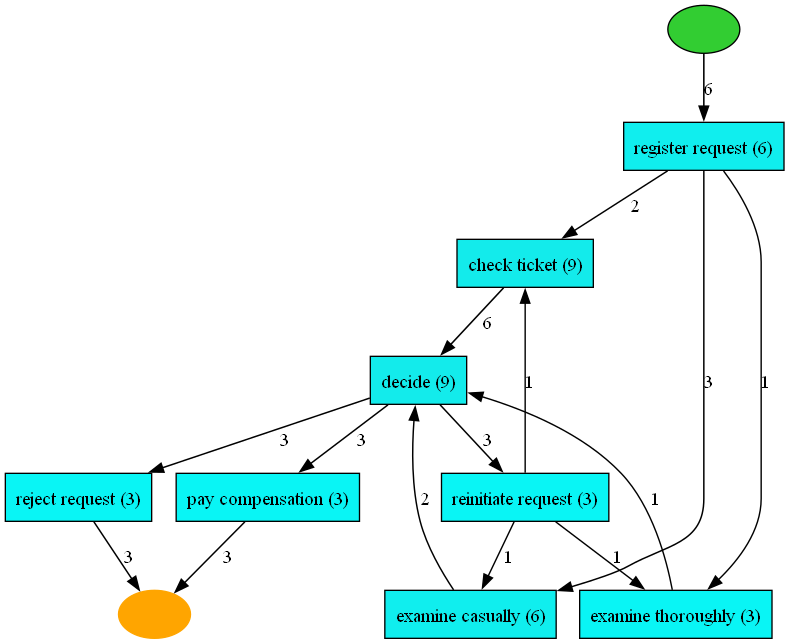

In [ ]:
# Process Map Heuristic Miner
if __name__ == "__main__":
    log = pm4py.read_xes('C:\\Users\\meduarda\\Downloads\\running-example.xes')

    map = pm4py.discover_heuristics_net(log)
    pm4py.view_heuristics_net(map)

In [ ]:
# Crio uma rede de petri em PNML
rede_petri, start, end = pm4py.discover_petri_net_alpha(event_log)
pm4py.write.write_pnml(rede_petri, start, end, 'C:\\Users\\meduarda\\Downloads\\rede_petri.pnml')

In [ ]:
# Teste grafico no Graphviz
graph = graphviz.Graph()

graph.node("A", label="Nó A")
graph.node("B", label="Nó B")
graph.node("C", label="Nó C")

graph.edge("A", "B", label="Aresta AB")
graph.edge("B", "C", label="Aresta BC")

# graph.attr("node", shape="circle", color="blue")
# graph.attr("edge", color="red")

graph.render("meu_grafico", format= 'png')
# não é uma rede de petri, eu estou aprendendo a usar o graphviz ainda

'meu_grafico.png'

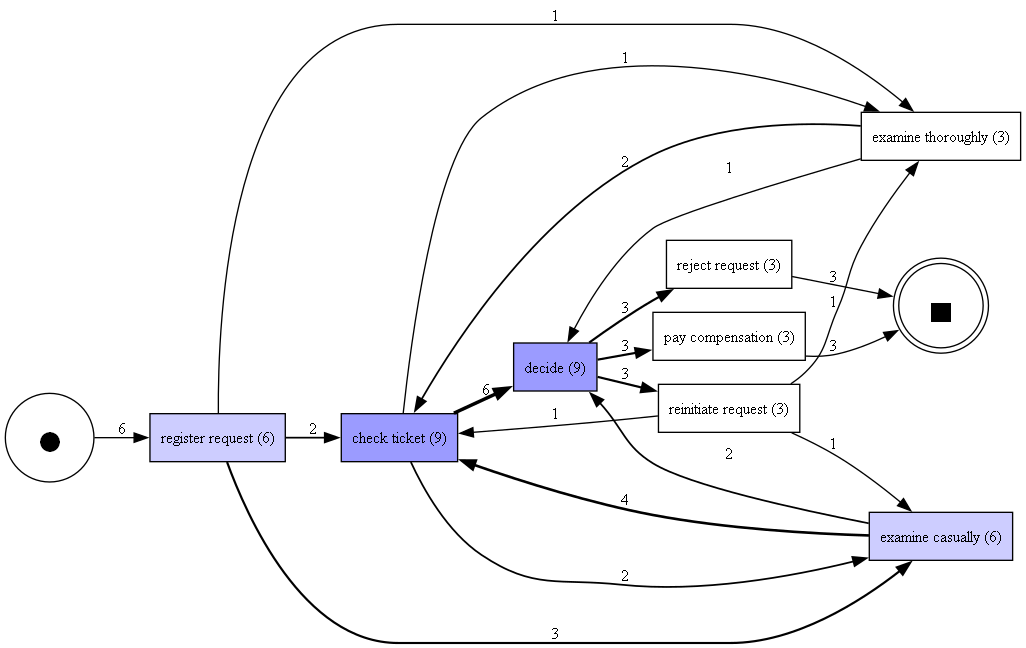

In [ ]:
# Process Map DFG de frequencia
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log, case_id_key='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')
pm4py.view_dfg(dfg, start_activities, end_activities)

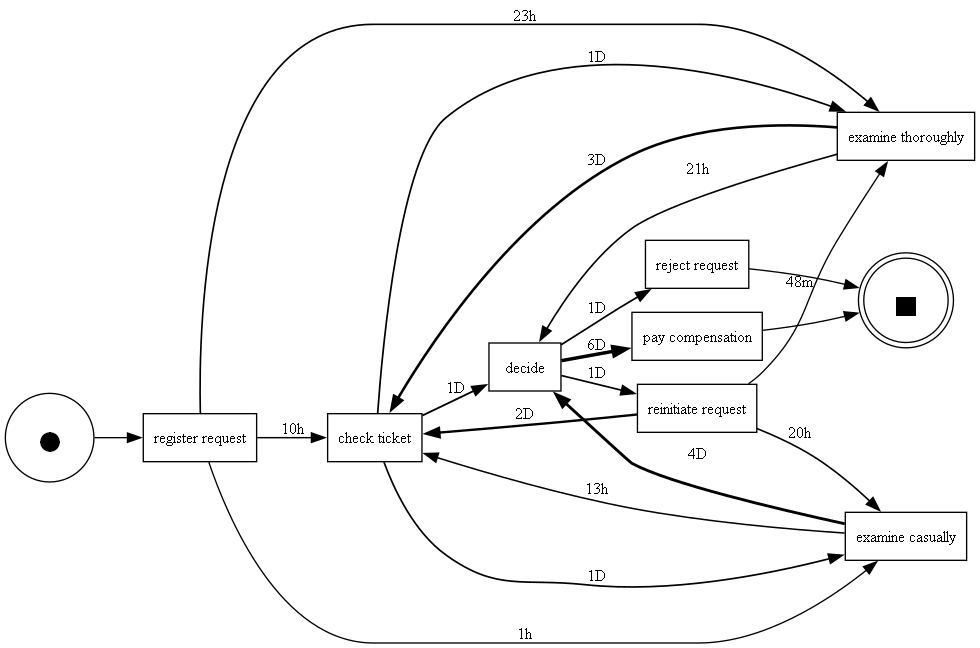

In [ ]:
# Process Map DFG de performance(duração)
performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(event_log, case_id_key='case:concept:name', activity_key='concept:name', 
                                                                                   timestamp_key='time:timestamp')
pm4py.view_performance_dfg(performance_dfg, start_activities, end_activities, aggregation_measure=['frequency'])

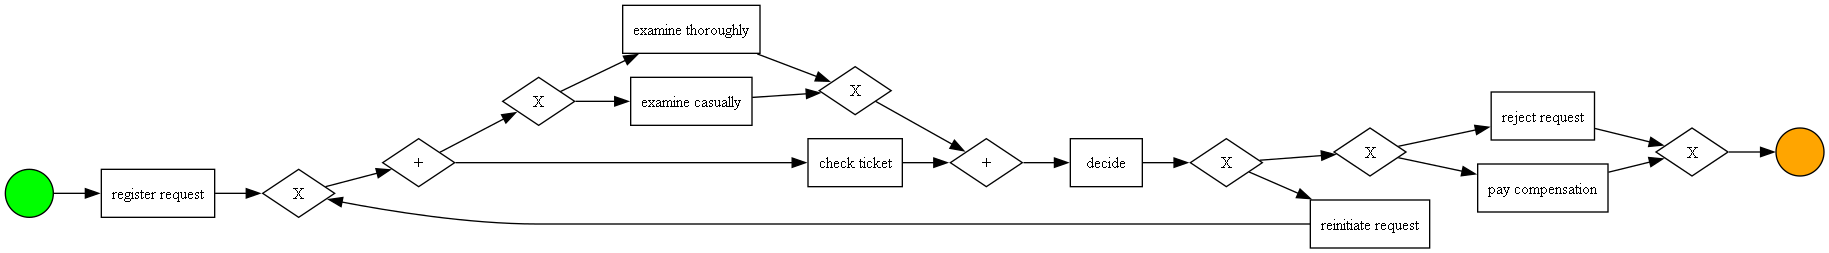

In [ ]:
# Process Model BPMN
bpmn_graph = pm4py.discover_bpmn_inductive(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_bpmn(bpmn_graph)

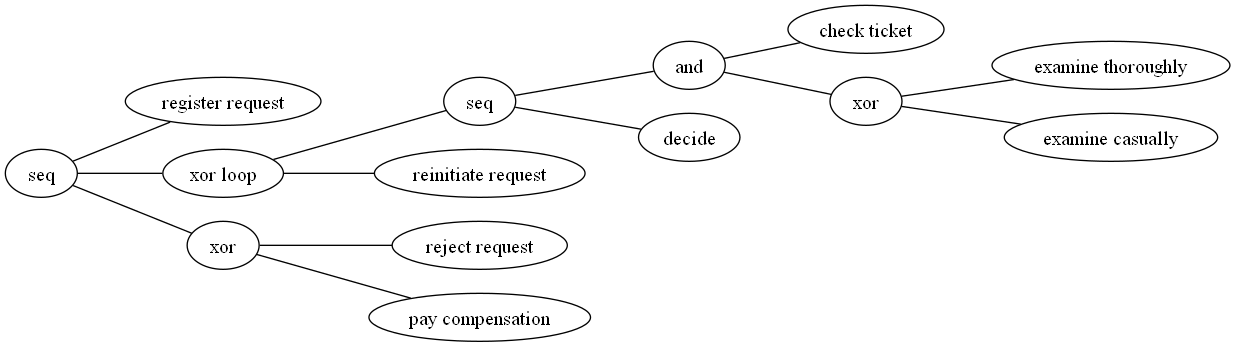

In [ ]:
# Process Model (Process Tree)
process_Tree = pm4py.discover_process_tree_inductive(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_process_tree(process_Tree)

# Teste de funções:

In [ ]:
# Calcula o tempo médio, máximo, minimo... no inntervalo entre um evento e outro e retorna um dict
performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(event_log, case_id_key='case:concept:name', 
                                                                                   activity_key='concept:name', timestamp_key='time:timestamp')
performance_dfg

{('check ticket', 'decide'): {'mean': 181960.0,
  'median': 129300.0,
  'max': 578640.0,
  'min': 1800.0,
  'sum': 1091760.0,
  'stdev': 206034.11756308711},
 ('check ticket', 'examine casually'): {'mean': 92430.0,
  'median': 92430.0,
  'max': 177420.0,
  'min': 7440.0,
  'sum': 184860.0,
  'stdev': 120194.01066608935},
 ('check ticket', 'examine thoroughly'): {'mean': 95820.0,
  'median': 95820.0,
  'max': 95820.0,
  'min': 95820.0,
  'sum': 95820.0,
  'stdev': nan},
 ('decide', 'pay compensation'): {'mean': 514160.0,
  'median': 521400.0,
  'max': 759300.0,
  'min': 261780.0,
  'sum': 1542480.0,
  'stdev': 248839.00578486486},
 ('decide', 'reinitiate request'): {'mean': 66400.0,
  'median': 91800.0,
  'max': 96600.0,
  'min': 10800.0,
  'sum': 199200.0,
  'stdev': 48210.78717465625},
 ('decide', 'reject request'): {'mean': 154240.0,
  'median': 97560.0,
  'max': 272520.0,
  'min': 92640.0,
  'sum': 462720.0,
  'stdev': 102463.01967051333},
 ('examine casually', 'check ticket'): {'me

In [ ]:
import pm4py
import datetime as dt

if __name__ == "__main__":
    event_log = pm4py.read_xes("C:\\Users\\meduarda\\Downloads\\running-example.xes")
    print(event_log)

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1645.15it/s]

          concept:name            time:timestamp  cost:total org:resource  \
0     register request 2010-12-30 11:02:00+00:00          50         Pete   
1   examine thoroughly 2010-12-31 10:06:00+00:00         400          Sue   
2         check ticket 2011-01-05 15:12:00+00:00         100         Mike   
3               decide 2011-01-06 11:18:00+00:00         200         Sara   
4       reject request 2011-01-07 14:24:00+00:00         200         Pete   
5     register request 2010-12-30 11:32:00+00:00          50         Mike   
6         check ticket 2010-12-30 12:12:00+00:00         100         Mike   
7     examine casually 2010-12-30 14:16:00+00:00         400         Sean   
8               decide 2011-01-05 11:22:00+00:00         200         Sara   
9     pay compensation 2011-01-08 12:05:00+00:00         200        Ellen   
10    register request 2010-12-30 14:32:00+00:00          50         Pete   
11    examine casually 2010-12-30 15:06:00+00:00         400         Mike   

In [ ]:
# Retorna um dicionario com tupla de atividades e tupla de média e desvio padrão entre essas atividades
temporal_profile = pm4py.discover_temporal_profile(event_log, activity_key='concept:name', case_id_key='case:concept:name', 
                                                   timestamp_key='time:timestamp')
for activity, (mean, std_dev) in temporal_profile.items():
    print(f"Atividade: {activity}, Média: {mean:.2f}, Desvio Padrão: {std_dev:.2f}")

Atividade: ('check ticket', 'check ticket'), Média: 751995.00, Desvio Padrão: 266259.25
Atividade: ('check ticket', 'decide'), Média: 466583.08, Desvio Padrão: 403657.74
Atividade: ('check ticket', 'examine casually'), Média: 518472.00, Desvio Padrão: 439733.43
Atividade: ('check ticket', 'examine thoroughly'), Média: 344070.00, Desvio Padrão: 351078.52
Atividade: ('check ticket', 'pay compensation'), Média: 875265.00, Desvio Padrão: 333709.33
Atividade: ('check ticket', 'reinitiate request'), Média: 605115.00, Desvio Padrão: 320112.87
Atividade: ('check ticket', 'reject request'), Média: 629388.00, Desvio Padrão: 503863.69
Atividade: ('decide', 'check ticket'), Média: 412080.00, Desvio Padrão: 363478.93
Atividade: ('decide', 'decide'), Média: 626475.00, Desvio Padrão: 397779.39
Atividade: ('decide', 'examine casually'), Média: 542160.00, Desvio Padrão: 385126.22
Atividade: ('decide', 'examine thoroughly'), Média: 13680.00, Desvio Padrão: 0.00
Atividade: ('decide', 'pay compensation'),

In [ ]:
log_skeleton = pm4py.discover_log_skeleton(event_log, noise_threshold=0.1, activity_key='concept:name', 
                                           case_id_key='case:concept:name', timestamp_key='time:timestamp')
log_skeleton

{'equivalence': {('check ticket', 'decide'),
  ('decide', 'check ticket'),
  ('examine thoroughly', 'register request'),
  ('pay compensation', 'examine casually'),
  ('pay compensation', 'register request'),
  ('reject request', 'register request')},
 'always_after': {('check ticket', 'decide'),
  ('examine casually', 'check ticket'),
  ('examine casually', 'decide'),
  ('examine thoroughly', 'decide'),
  ('register request', 'check ticket'),
  ('register request', 'decide'),
  ('register request', 'examine casually'),
  ('reinitiate request', 'check ticket'),
  ('reinitiate request', 'decide'),
  ('reinitiate request', 'examine casually')},
 'always_before': {('check ticket', 'register request'),
  ('decide', 'check ticket'),
  ('decide', 'examine casually'),
  ('decide', 'register request'),
  ('examine casually', 'register request'),
  ('examine thoroughly', 'register request'),
  ('pay compensation', 'check ticket'),
  ('pay compensation', 'decide'),
  ('pay compensation', 'examin

In [ ]:
import pm4py
import datetime as dt

def import_xes(file_path):
    event_log = pm4py.read_xes(file_path)
    # start_activities = pm4py.get_start_activities(event_log)
    # end_activities = pm4py.get_end_activities(event_log)
    # process_tree = pm4py.discover_process_tree_inductive(event_log)
    # bpmn_model = pm4py.convert_to_bpmn(process_tree)
    # pm4py.view_bpmn(bpmn_model)
    #print('FILTRA OS ATENDENTES APENAS EM PETE:\n', filltred)
    filltred = pm4py.filter_event_attribute_values(event_log, attribute_key='org:resource', values={'Pete'}, level='event')
    #filtra apenas trilhas onde diuas atividades acontecem durante o evento
    filtered5 = pm4py.filter_eventually_follows_relation(event_log, [('examine casually', 'reject request')])
    #filtra o log de eventos baseado num determinado intervalo de tempo
    filtered6 = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 10), dt.datetime(2011, 1, 1), mode='events')
    #filtra o log de eventos baseado num determinado intervalo de tempo, pega qualquer caminho que contém pelo menos um evento que se enquadre no caminho
    filtered6 = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 10), dt.datetime(2011, 1, 1), mode='traces_intersecting')
    # filtra uma sequencia inteira
    filtered3 = pm4py.filter_variants(event_log, [['register request', 'examine casually']])

    # ainda não entendi o que faz
    filtered2 = pm4py.filter_trace_attribute_values(event_log, 'concept:name', {'register request'}, retain=False)
    # ainda não entendi o que faz também
    filtered4 = pm4py.filter_directly_follows_relation(event_log, [('register request', 'examine thoroughly')], retain=True)

    
    # print(filtered3)
    # print(filtered3)
    # print(filtered4)


if __name__ == "__main__":
    import_xes("C:\\Users\\meduarda\\Downloads\\running-example.xes")


# if __name__ == "__main__":
#     event_log = pm4py.read_xes('C:\\Users\\meduarda\\Downloads\\running-example.xes')
#     pm4py.write_xes(event_log, 'C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\running-example-exported.xes')

In [ ]:
# Retorna um dicionário onde como chave recebe a posição que aquela atividade foi realizada nos eventos e a quantidade de 
#vezes que aparece
act_pos = pm4py.get_activity_position_summary(event_log, 'reinitiate request', activity_key='concept:name', 
                                              case_id_key='case:concept:name', timestamp_key='time:timestamp')
act_pos

{4: 2, 8: 1}

In [ ]:
event_attributes = pm4py.get_event_attributes(event_log)
event_attributes

['case_id',
 'activity',
 'timestamp',
 'costs',
 'resource',
 'case:concept:name',
 'concept:name',
 'time:timestamp',
 '@@index',
 '@@case_index',
 'start_timestamp']

In [ ]:
# Retorna um dict com variantes de cada evento
variants = pm4py.get_variants_as_tuples(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
variants

{('register request',
  'examine thoroughly',
  'check ticket',
  'decide',
  'reject request'): 1,
 ('register request',
  'check ticket',
  'examine casually',
  'decide',
  'pay compensation'): 1,
 ('register request',
  'examine casually',
  'check ticket',
  'decide',
  'reinitiate request',
  'examine thoroughly',
  'check ticket',
  'decide',
  'pay compensation'): 1,
 ('register request',
  'check ticket',
  'examine thoroughly',
  'decide',
  'reject request'): 1,
 ('register request',
  'examine casually',
  'check ticket',
  'decide',
  'reinitiate request',
  'check ticket',
  'examine casually',
  'decide',
  'reinitiate request',
  'examine casually',
  'check ticket',
  'decide',
  'reject request'): 1,
 ('register request',
  'examine casually',
  'check ticket',
  'decide',
  'pay compensation'): 1}

In [ ]:
# Retorna um dataframe com a qntd de vezes que um evento aconteceu e o tempo total dele
# @index_in_trace: explica em que posição aconteceu naquele traço
# @cumulative_occ_path_column indicará quantas vezes cada caminho específico (variante) foi executado até aquele 
# ponto em um caso específico.
variants = pm4py.get_variants_paths_duration(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
variants

,@@index_in_trace,@@flow_time,@@cumulative_occ_path_column,concept:name,concept:name_2,@@variant_column,@@variant_count
0,0,83040.0,0,register request,examine thoroughly,"(register request, examine thoroughly, check t...",1
1,1,450360.0,0,examine thoroughly,check ticket,"(register request, examine thoroughly, check t...",1
2,2,72360.0,0,check ticket,decide,"(register request, examine thoroughly, check t...",1
3,3,97560.0,0,decide,reject request,"(register request, examine thoroughly, check t...",1
0,0,2040.0,0,register request,examine casually,"(register request, examine casually, check tic...",1
1,1,5280.0,0,examine casually,check ticket,"(register request, examine casually, check tic...",1
2,2,578640.0,0,check ticket,decide,"(register request, examine casually, check tic...",1
3,3,10800.0,0,decide,reinitiate request,"(register request, examine casually, check tic...",1
4,4,2880.0,0,reinitiate request,examine thoroughly,"(register request, examine casually, check tic...",1
5,5,167820.0,0,examine thoroughly,check ticket,"(register request, examine casually, check tic...",1


# (SPRINT2) Análise de conformidade

In [ ]:
#tentaiva de abrir o arquivo pnml
grafico = pm4py.read_pnml('C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\running-example-model-convertido.pnml')


C:\Users\meduarda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pm4py\objects\petri_net\importer\variants\pnml.py:354: UserWarning: the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking
  warnings.warn("the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking")


In [17]:
dataframe = pm4py.format_dataframe(pandas.read_csv("C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\running-example_3.csv", sep=';'), case_id='case_id', activity_key='activity', timestamp_key='timestamp')
dataframeModel = pm4py.read_xes('C:\\Users\\meduarda\\Downloads\\running-example.xes')
pm4py.conformance_declare(dataframe, dataframeModel)

C:\Users\meduarda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1501.18it/s]


[{'no_constr_total': 252,
  'deviations': [],
  'no_dev_total': 0,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'no_constr_total': 252,
  'deviations': [],
  'no_dev_total': 0,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'no_constr_total': 252,
  'deviations': [],
  'no_dev_total': 0,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'no_constr_total': 252,
  'deviations': [],
  'no_dev_total': 0,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'no_constr_total': 252,
  'deviations': [],
  'no_dev_total': 0,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'no_constr_total': 252,
  'deviations': [],
  'no_dev_total': 0,
  'dev_fitness': 1.0,
  'is_fit': True}]

#### Precisa converter o arquivo pmnl se não conseguir acessar

In [ ]:
import xml.etree.ElementTree as ET

#Caminho para o arquivo EPNML
path_epnml = "C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\running-example-yasper.pnml"

#Carregar o arquivo EPNML
tree = ET.parse(path_epnml)
root = tree.getroot()

#Modificar o tipo para PNML
namespace_pnml = "http://www.pnml.org/version-2024/grammar/pnmlcoremodel"

for elem in root.iter():
    if '}' in elem.tag:
        elem.tag = elem.tag.split('}', 1)[1]  # remove o namespace atual
        elem.set('xmlns', namespace_pnml)  # define o novo namespace

# Salvar o arquivo modificado como PNML
caminho_pnml_convertido = "C:\\Users\\meduarda\\Downloads\\running-example-convertido2.pnml"
tree.write(caminho_pnml_convertido, encoding="UTF-8", xml_declaration=True)

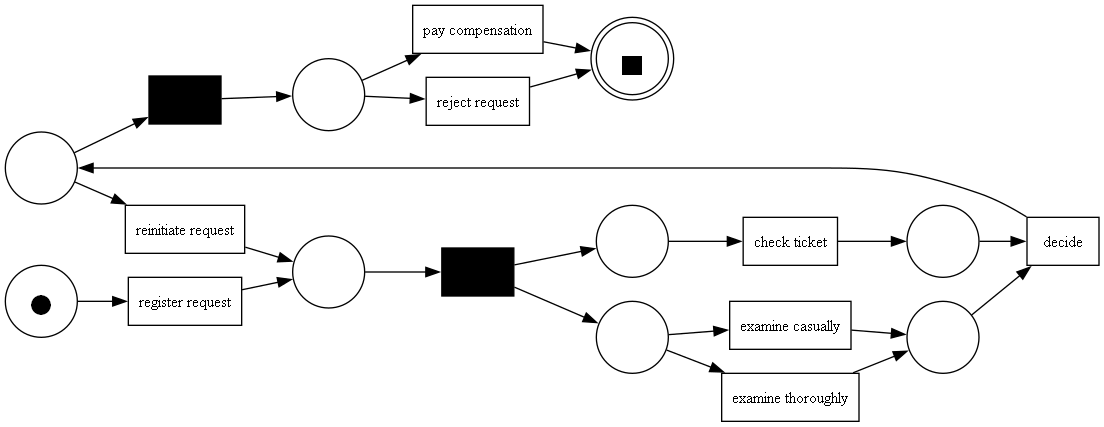

replaying log with TBR, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 688.55it/s]


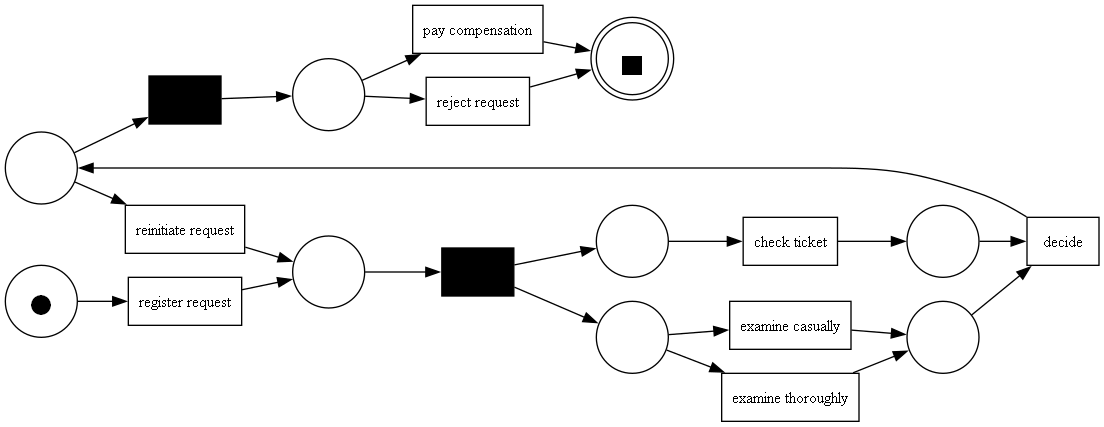

ValueError: No image data found. Expecting filename, url, or data.

In [27]:
# modelDataframePmnl, start, end =  pm4py.read_pnml('C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\running-example-model-convertido.pnml')
#-------------------------------------------------
pn, ini, fim = pm4py.discover_petri_net_inductive(dataframe)
df_problems = pm4py.format_dataframe(pandas.read_csv("C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\exemplo-modificado.csv", sep=';'), case_id='case_id', activity_key='activity', timestamp_key='timestamp')

# declare_model = pm4py.discover_declare(df_problems)
pm4py.view_petri_net(pn,ini,fim)

conformance = pm4py.fitness_token_based_replay(dataframe, pn, ini, fim)
conformance

 
# arquivoPnml = pm4py.conformance.conformance_diagnostics_alignments(df_problems, pn, ini, fim)

In [ ]:
# modelDataframePmnl, start, end =  pm4py.read_pnml('C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\running-example-model-convertido.pnml')
# #-------------------------------------------------
# pn, ini, fim = pm4py.discover_petri_net_inductive(dataframe)
# df_problems = pm4py.format_dataframe(pandas.read_csv("C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\exemplo-modificado.csv", sep=';'), case_id='case_id', activity_key='activity', timestamp_key='timestamp')

# declare_model = pm4py.discover_declare(df_problems)
# pm4py.view_petri_net(pn,ini,fim)

# conformance = pm4py.fitness_token_based_replay(dataframe, pn, ini, fim)
# conformance

 
# arquivoPnml = pm4py.conformance.conformance_diagnostics_alignments(df_problems, pn, ini, fim)

FUNÇÕES INTERESSANTES:
### pm4py
.format_dataframe() --- cria uma cópia do log de eventos e renomeia as colunas para nomes padroes do pm4py(arquivos csv).

.read_xes(file_path) --- carrega um arquivo xes para o pm4py como um objeto Log de Eventos

.get_start_activities(event_log) ---

.get_end_activities(event_log) --- retorna um dicionário com atividade final de cada evento e quantas vezes ela acontece

.write_xes() --- transforma um quadro de dados do pandas em um arq .xes

.convert_to_dataframe() --- converte o log de eventos em quadro de dados que pode ser exportado com o pandas (ex:transformar em csv)
### pandas
.read_csv(<<caminho do código>>, sep=';')

event_log.to_csv() --- importa o arquivo csv de exemplo em execução como um quadro de dados do pandas e o exporta para um arquivo csv no local
### graphviz


# vídeo tutorial PM4PY
### Variants.Basic_Playout
Parameters.ACTIVITY_KEY: o nome do atributo a ser usado como atividade no log de playout
Parameters.TIMESTAMP_KEY:  o nome do atributo a ser usado como timestamp no log de playout
Parameters.CASE_ID_KEY: o atributo trace que deve ser usado como identificador de casos no log de playout
Parameters.NO_TRACES: o numero de tracos que o log de playout deve conter (perguntar sobre e se pode ser usado como uma variável para visualização do log de eventos mais simplificado)
Parameters.MAX_TRACE_LENGTH: o comprimento maximo apos o qual a reprodução do trace que deve ser interrompida

### Variants.EXPENSIVE(é mais custoso para o programa porque retorna todas as execuções que são possíveis)
Parameters.ACTIVITY_KEY: o nome do atributo a ser usado como atividade no log de playout
Parameters.TIMESTAMP_KEY:  o nome do atributo a ser usado como timestamp no log de playout
Parameters.CASE_ID_KEY: o atributo trace que deve ser usado como identificador de casos no log de playout
Parameters.MAX_TRACE_LENGTH: o comprimento maximo apos o qual a reprodução do trace que deve ser interrompida


In [28]:
#imports usados nesse vídeo:
import pm4py
# from pm4py.simulation.playout import simulator
# from pm4py.objects.petri.importer import pmnl_importer
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.transition_system import visualizer as ts_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
from IPython.display import Image
# from pm4py.objects.petri import reachability_graph
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

ModuleNotFoundError: No module named 'pm4py.simulation'